**Linear int8 Quantization**

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate original float values (e.g., model weights)
x = np.linspace(-1.0, 1.0, 100)

# Define quantization parameters for int8
min_x, max_x = -1.0, 1.0
qmin, qmax = -128, 127

# Calculate scale for symmetric quantization
# The 'step size' between each integer value
scale = (max_x - min_x) / (qmax - qmin)
zero_point = 0 

# Quantization: float -> int8
# We shift by the zero point, divide by scale, and round to the nearest whole number
q = np.round((x - zero_point) / scale).astype(int)
q = np.clip(q, qmin, qmax) # Ensure values stay within the 8-bit range
q[:10]

array([-128, -125, -122, -120, -117, -115, -112, -109, -107, -104])

In [4]:
# Dequantization: int8 -> float
# This is what the model "sees" during inference
x_hat = scale * (q - zero_point)
x_hat[:10]

array([-1.00392157, -0.98039216, -0.95686275, -0.94117647, -0.91764706,
       -0.90196078, -0.87843137, -0.85490196, -0.83921569, -0.81568627])

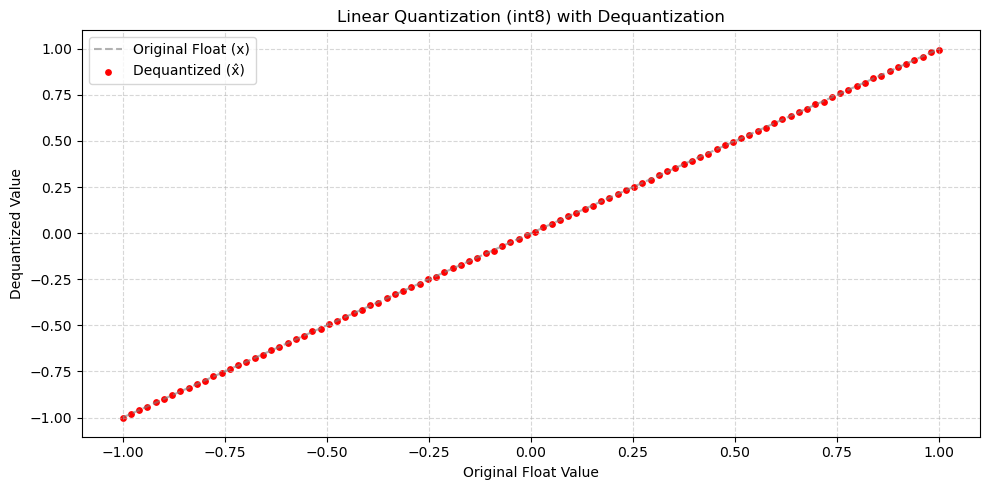

In [3]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(x, x, label='Original Float (x)', linestyle='--', color='gray', alpha=0.6)
plt.scatter(x, x_hat, label='Dequantized (x̂)', color='red', s=15)
plt.title('Linear Quantization (int8) with Dequantization')
plt.xlabel('Original Float Value')
plt.ylabel('Dequantized Value')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

**NF4 (Normal Float 4) Quantization**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# SDefine 16 NF4 representative float values (4-bit = 2^4 = 16 values)
# NF4 values are denser near 0 to capture the bulk of the weight distribution
nf4_values = np.array([
    -1.0, -0.75, -0.5, -0.35, -0.2, -0.1, -0.05, -0.01,
     0.01,  0.05,  0.1,  0.2,  0.35,  0.5,  0.75,  1.0
])

# Simulate original float values
x = np.linspace(-1.0, 1.0, 100)
x

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [7]:
# Quantize x by mapping to the nearest NF4 value in our LUT
def quantize_to_nf4(x_vals, nf4_lut):
    # Calculate absolute distance between each x and all 16 NF4 values
    # Choose the index of the minimum distance
    indices = np.argmin(np.abs(x_vals[:, None] - nf4_lut[None, :]), axis=1)
    return nf4_lut[indices]

x_nf4 = quantize_to_nf4(x, nf4_values)
x_nf4[:10]

array([-1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -0.75, -0.75,
       -0.75])

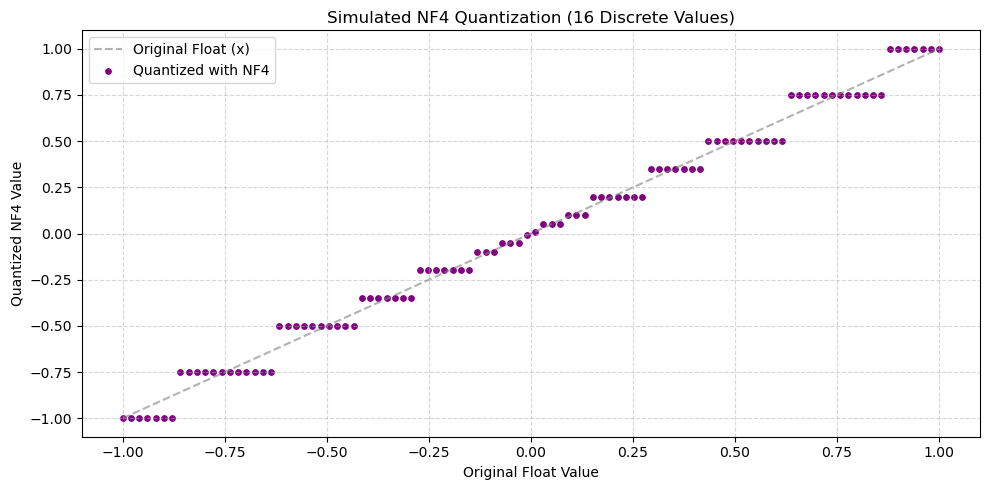

In [8]:
# Plot original vs. quantized (NF4)
plt.figure(figsize=(10, 5))
plt.plot(x, x, label='Original Float (x)', linestyle='--', color='gray', alpha=0.6)
plt.scatter(x, x_nf4, label='Quantized with NF4', color='purple', s=15)
plt.title('Simulated NF4 Quantization (16 Discrete Values)')
plt.xlabel('Original Float Value')
plt.ylabel('Quantized NF4 Value')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()